# Objective

The objective of this project is to conduct a comprehensive analysis of a company's sales and inventory data to identify key performance drivers, reveal potential inefficiencies, and formulate strategic recommendations. The analysis focuses on understanding critical financial metrics such as gross profit, profit margins, freight costs, and stock turnover rates.
By employing data filtering techniques to remove inconsistent data points, the project aims to ensure the reliability of its findings. It explores the relationships between various factors, including purchase price, sales quantity, and profitability, through correlation analysis. The insights gathered from this analysis will be used to develop actionable recommendations for the company to achieve sustainable profitability, mitigate risks, and enhance overall operational efficiency.

In [1]:
import numpy as np
import sqlite3
import pandas as pd
conn = sqlite3.connect('inventory.db')
tables = pd.read_sql_query("SELECT name from sqlite_master WHERE type='table'",conn)
tables 

,name
0,vendor_invoice
1,begin_inventory
2,end_inventory
3,purchases
4,purchase_prices
5,sales
6,vendor_sales_summary


- **PONumber** stands for Purchase Order Number: a unique identifier assigned to a purchase order (PO) issued by a buyer (e.g., a company or retailer) to a vendor (supplier). 
- **Onhand** The quantity of the item available in stock at the beginning of the reporting period (e.g., start of the month, quarter, or fiscal year).

In [2]:
import numpy as np
import sqlite3
import pandas as pd

# Iterate through table names correctly
for table_name in tables['name']:  # Access the 'name' column
    print('-'*50, f" {table_name}", '-'*50)
    print('Count of records:', pd.read_sql(f'select count(*) as count from {table_name}', conn)['count'][0])
    display(pd.read_sql(f'select * from {table_name} limit 5', conn).head())

--------------------------------------------------  vendor_invoice --------------------------------------------------


Count of records: 5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


--------------------------------------------------  begin_inventory --------------------------------------------------
Count of records: 206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


--------------------------------------------------  end_inventory --------------------------------------------------
Count of records: 224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


--------------------------------------------------  purchases --------------------------------------------------
Count of records: 2372474


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


--------------------------------------------------  purchase_prices --------------------------------------------------
Count of records: 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


--------------------------------------------------  sales --------------------------------------------------
Count of records: 12825363


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


--------------------------------------------------  vendor_sales_summary --------------------------------------------------
Count of records: 10692


,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,TotalFreight,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,142049.0,5101919.51,260999.20,68601.68,961067.03,18.837362,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,160247.0,4819073.49,294438.66,144929.24,575664.37,11.945540,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,187140.0,4538120.60,343854.07,123780.22,652182.63,14.371205,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,200412.0,4475972.88,368242.80,257032.07,589500.07,13.170323,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,135838.0,4223107.62,249587.83,257032.07,693281.71,16.416387,0.983556,1.396897


In [36]:
purchases = pd.read_sql_query('select distinct VendorNumber, VendorName from purchases',conn)
purchases


,VendorNumber,VendorName
0,105,ALTAMAR BRANDS LLC
1,4466,AMERICAN VINTAGE BEVERAGE
2,388,ATLANTIC IMPORTING COMPANY
3,480,BACARDI USA INC
4,516,BANFI PRODUCTS CORP
...,...,...
124,4901,LAUREATE IMPORTS CO
125,90059,BLACK COVE BEVERAGES
126,5083,LOYAL DOG WINERY
127,1587,VINEYARD BRANDS LLC


- The purchases table contains actual purchase data, including the date of purchase, products (brands) purchased by vendors, the amount paid (in dollars), and the quantity purchased.

- The purchase price column is derived from the purchase_prices table, which provides product-wise actual and purchase prices. The combination of vendor and brand is unique in this table.

- The vendor_invoice table aggregates data from the purchases table, summarizing quantity and dollar amounts, along with an additional column for freight.

This table maintains uniqueness based on vendor and PO number.

- The sales table captures actual sales transactions, detailing the brands purchased by vendors, the quantity sold, the selling price, and the revenue earned.
---
As the data that we need for analysis is distributed in different tables, we need to create a summary table containing:

- purchase transactions made by vendors

- sales transaction data

- freight costs for each vendor

- actual product prices from vendors

In [ ]:
freight_summary = pd.read_sql_query(
""" SELECT VendorNumber, VendorName,
SUM(Freight) AS TotalFreight 
FROM vendor_invoice 
GROUP BY VendorNumber,VendorName""",conn)
freight_summary

,VendorNumber,VendorName,TotalFreight
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",27.08
1,54,AAPER ALCOHOL & CHEMICAL CO,0.48
2,60,ADAMBA IMPORTS INTL INC,367.52
3,105,ALTAMAR BRANDS LLC,62.39
4,200,AMERICAN SPIRITS EXCHANGE,6.19
...,...,...,...
124,98450,Serralles Usa LLC,856.02
125,99166,STARK BREWING COMPANY,130.09
126,172662,SWEETWATER FARM,178.34
127,173357,TAMWORTH DISTILLING,202.50


In [106]:
ab = freight_summary['VendorNumber'].value_counts()
for i in ab.values:
    if i>1:
        print(ab.index[ab.values == i])

Index([2000, 4425, 1587], dtype='int64', name='VendorNumber')
Index([2000, 4425, 1587], dtype='int64', name='VendorNumber')
Index([2000, 4425, 1587], dtype='int64', name='VendorNumber')


In [9]:
pd.read_sql_query("""SELECT
p.VendorNumber,
p.VendorName,
p.Brand,
p.PurchasePrice,
pp.Volume,
pp.Price as ActualPrice,
SUM(p.Quantity) as TotalPurchaseQuantity,
SUM(p.Dollars) as TotalPurchaseDollars
FROM purchases p
JOIN purchase_prices pp
ON p.Brand = pp. Brand
WHERE p.PurchasePrice >0
GROUP BY p. VendorNumber, p. VendorName, p.Brand
ORDER BY TotalPurchaseDollars DESC""",conn)
# Where Condn is to remove some unncessary wrong data

,VendorNumber,VendorName,Brand,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars
0,1128,BROWN-FORMAN CORP,1233,26.27,1750,36.99,145080,3811251.60
1,4425,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,164038,3804041.22
2,17035,PERNOD RICARD USA,8068,18.24,1750,24.99,187407,3418303.68
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,201682,3261197.94
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750,29.99,138109,3023206.01
...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,1.32,750,4.99,2,2.64
10688,8004,SAZERAC CO INC,5683,0.39,50,0.49,6,2.34
10689,3924,HEAVEN HILL DISTILLERIES,9123,0.74,50,0.99,2,1.48
10690,3960,DIAGEO NORTH AMERICA INC,6127,1.47,200,1.99,1,1.47


In [8]:
pd.read_sql_query('SELECT * FROM sales LIMIT 15',conn)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
5,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,1,34.99,34.99,2024-01-15,375.0,1,0.39,12546,JIM BEAM BRANDS COMPANY
6,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,1,34.99,34.99,2024-01-22,375.0,1,0.39,12546,JIM BEAM BRANDS COMPANY
7,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,1,34.99,34.99,2024-01-30,375.0,1,0.39,12546,JIM BEAM BRANDS COMPANY
8,1_HARDERSFIELD_10058,1,10058,F Coppola Dmd Ivry Cab Svgn,750mL,4,59.96,14.99,2024-01-05,750.0,2,0.45,2000,SOUTHERN WINE & SPIRITS NE
9,1_HARDERSFIELD_10058,1,10058,F Coppola Dmd Ivry Cab Svgn,750mL,1,14.99,14.99,2024-01-06,750.0,2,0.11,2000,SOUTHERN WINE & SPIRITS NE



SalesDollars = SalesPrice*SalesQuantity

In [7]:
pd.read_sql_query("""SELECT 
    VendorNo,
    VendorName,
    Brand,
    SUM(SalesDollars) AS TotalSalesDollars,
    SUM(SalesQuantity) AS TotalSalesQuantity,
    SUM(ExciseTax) AS TotalExciseTax
FROM sales
GROUP BY VendorNo, VendorName, Brand
ORDER BY TotalSalesDollars DESC""", conn)

,VendorNo,VendorName,Brand,TotalSalesDollars,TotalSalesQuantity,TotalExciseTax
0,1128,BROWN-FORMAN CORP,1233,5101919.51,142049,260999.20
1,4425,MARTIGNETTI COMPANIES,3405,4819073.49,160247,294438.66
2,17035,PERNOD RICARD USA,8068,4538120.60,187140,343854.07
3,3960,DIAGEO NORTH AMERICA INC,4261,4475972.88,200412,368242.80
4,3960,DIAGEO NORTH AMERICA INC,3545,4223107.62,135838,249587.83
...,...,...,...,...,...,...
11267,3252,E & J GALLO WINERY,3933,1.98,2,0.10
11268,3924,HEAVEN HILL DISTILLERIES,9123,1.98,2,0.10
11269,10050,Russian Standard Vodka,3623,1.98,2,0.10
11270,9206,PHILLIPS PRODUCTS CO.,2773,0.99,1,0.05


In [4]:
Vendor_Sales_Summary = pd.read_sql_query("""
With FreightSummary As
                                         ( 
SELECT VendorNumber,
SUM(Freight) AS TotalFreight 
FROM vendor_invoice 
GROUP BY VendorNumber
                                         ),                                 
PurchaseSummary AS 
                                         ( 
SELECT
    p.VendorNumber,
    p.VendorName,
    p.Brand,
    p.Description,
    p.PurchasePrice,
    pp.Volume,
    pp.Price as ActualPrice,
    SUM(p.Quantity) as TotalPurchaseQuantity,
    SUM(p.Dollars) as TotalPurchaseDollars
    FROM purchases p
    JOIN purchase_prices pp
    ON p.Brand = pp. Brand
    WHERE p.PurchasePrice >0
    GROUP BY p. VendorNumber, p. VendorName, p.Brand,p.Description,p.PurchasePrice,pp.Price,pp.Volume
                                         ),
SalesSummary AS 
                                          (
SELECT 
    VendorNo,
    VendorName,
    Brand,
    SUM(SalesDollars) AS TotalSalesDollars,
    SUM(SalesQuantity) AS TotalSalesQuantity,
    SUM(ExciseTax) AS TotalExciseTax
    FROM sales
    GROUP BY VendorNo, Brand   
 )
SELECT 
    ps.VendorNumber,
    ps.VendorName,
    ps.Brand,
    ps.Description,
    ps.PurchasePrice,
    ps.Volume,
    ps.ActualPrice,
    ps.TotalPurchaseQuantity,
    ps.TotalPurchaseDollars,                                   
    ss.TotalSalesQuantity,
    ss.TotalSalesDollars,
    ss.TotalExciseTax,
    fs.TotalFreight

FROM PurchaseSummary ps
LEFT JOIN SalesSummary ss
ON ps.VendorNumber = ss.VendorNo
AND ps.Brand = ss.Brand
LEFT JOIN FreightSummary fs
ON ps.VendorNumber = fs.VendorNumber
ORDER BY ps.TotalPurchaseDollars DESC""",conn)
Vendor_Sales_Summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,TotalFreight
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750,36.99,145080,3811251.60,142049.0,5101919.51,260999.20,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750,28.99,164038,3804041.22,160247.0,4819073.49,294438.66,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750,24.99,187407,3418303.68,187140.0,4538120.60,343854.07,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750,22.99,201682,3261197.94,200412.0,4475972.88,368242.80,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750,29.99,138109,3023206.01,135838.0,4223107.62,249587.83,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750,4.99,2,2.64,5.0,15.95,0.55,27100.41
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50,0.49,6,2.34,134.0,65.66,7.04,50293.62
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50,0.99,2,1.48,2.0,1.98,0.10,14069.87
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200,1.99,1,1.47,72.0,143.28,15.12,257032.07


This query generates a vendor-wise sales and purchase summary, which is valuable for:

Performance Optimization:

- The query involves heavy joins and aggregations on large datasets like sales and purchases.

- Storing the pre-aggregated results avoids repeated expensive computations.

- Helps in analyzing sales, purchases, and pricing for different vendors and brands.

- Future Benefits of Storing this data for faster Dashboarding & Reporting.

- Instead of running expensive queries each time, dashboards can fetch data quickly from vendor_sales_summary.

In [5]:
Vendor_Sales_Summary.dtypes

VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
PurchasePrice            float64
Volume                    object
ActualPrice              float64
TotalPurchaseQuantity      int64
TotalPurchaseDollars     float64
TotalSalesQuantity       float64
TotalSalesDollars        float64
TotalExciseTax           float64
TotalFreight             float64
dtype: object

In [6]:
Vendor_Sales_Summary.shape

(10692, 13)

In [7]:
Vendor_Sales_Summary['Volume'] =  Vendor_Sales_Summary['Volume'].astype('float64') 

In [8]:
Vendor_Sales_Summary.isnull().sum()

VendorNumber               0
VendorName                 0
Brand                      0
Description                0
PurchasePrice              0
Volume                     0
ActualPrice                0
TotalPurchaseQuantity      0
TotalPurchaseDollars       0
TotalSalesQuantity       178
TotalSalesDollars        178
TotalExciseTax           178
TotalFreight               0
dtype: int64

The Missing value means that the product is purchased by the vendor but it's not sold yet so replace NaN with 0.    

In [9]:
Vendor_Sales_Summary.fillna({'TotalSalesQuantity':0,'TotalSalesDollars':0,'TotalExciseTax':0},inplace=True)

In [10]:
Vendor_Sales_Summary.isna().sum().sum()

0

In [11]:
Vendor_Sales_Summary['VendorName'].unique()

array(['BROWN-FORMAN CORP          ', 'MARTIGNETTI COMPANIES',
       'PERNOD RICARD USA          ', 'DIAGEO NORTH AMERICA INC   ',
       'BACARDI USA INC            ', 'JIM BEAM BRANDS COMPANY    ',
       'MAJESTIC FINE WINES        ', 'ULTRA BEVERAGE COMPANY LLP ',
       'STOLI GROUP,(USA) LLC      ', 'PROXIMO SPIRITS INC.       ',
       'MOET HENNESSY USA INC      ', 'CAMPARI AMERICA            ',
       'SAZERAC CO INC             ', 'CONSTELLATION BRANDS INC   ',
       'M S WALKER INC             ', 'SAZERAC NORTH AMERICA INC. ',
       'PALM BAY INTERNATIONAL INC ', 'REMY COINTREAU USA INC     ',
       'SIDNEY FRANK IMPORTING CO  ', 'E & J GALLO WINERY         ',
       'WILLIAM GRANT & SONS INC   ', 'HEAVEN HILL DISTILLERIES   ',
       'DISARONNO INTERNATIONAL LLC', 'EDRINGTON AMERICAS         ',
       'CASTLE BRANDS CORP.        ', 'SOUTHERN WINE & SPIRITS NE ',
       'STE MICHELLE WINE ESTATES  ', 'TRINCHERO FAMILY ESTATES   ',
       'MHW LTD                    ', 'W

In [12]:
Vendor_Sales_Summary['VendorName'] = Vendor_Sales_Summary['VendorName'].str.strip()

In [13]:
Vendor_Sales_Summary['GrossProfit'] = Vendor_Sales_Summary['TotalSalesDollars'] - Vendor_Sales_Summary['TotalPurchaseDollars'] - Vendor_Sales_Summary['TotalFreight'] - Vendor_Sales_Summary['TotalExciseTax']

In [14]:
Vendor_Sales_Summary['ProfitMargin']= (Vendor_Sales_Summary['GrossProfit'] / Vendor_Sales_Summary['TotalSalesDollars']) * 100

In [15]:
 Vendor_Sales_Summary['StockTurnOver'] = Vendor_Sales_Summary['TotalSalesQuantity'] / Vendor_Sales_Summary['TotalPurchaseQuantity']

In [16]:
Vendor_Sales_Summary['SalestoPurchaseRatio'] = Vendor_Sales_Summary['TotalSalesDollars'] / Vendor_Sales_Summary['TotalPurchaseDollars']

In [17]:
Vendor_Sales_Summary.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Volume', 'ActualPrice', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalExciseTax', 'TotalFreight', 'GrossProfit', 'ProfitMargin',
       'StockTurnOver', 'SalestoPurchaseRatio'],
      dtype='object')

In [18]:
cursor=conn.cursor()
cursor.execute("""
CREATE TABLE IF NOT EXISTS vendor_sales_summary (
VendorNumber INT,
VendorName VARCHAR(100),
Brand INT,
Description VARCHAR(100),
PurchasePrice DECIMAL(10,2),
ActualPrice DECIMAL(10,2),
Volume,
TotalPurchaseQuantity INT,
TotalPurchaseDollars DECIMAL(15,2),
TotalSalesQuantity INT,
TotalSalesDollars DECIMAL(15,2),
TotalSalesPrice DECIMAL (15,2),
TotalExciseTax DECIMAL(15,2),
FreightCost DECIMAL(15,2),
GrossProfit DECIMAL(15,2),
ProfitMargin DECIMAL(15,2),
StockTurnover DECIMAL(15,2),
SalesToPurchaseRatio DECIMAL(15,2),
PRIMARY KEY (VendorNumber, Brand)
               );
""")

In [ ]:
pd.read_sql_query('select * FROM vendor_sales_summary',conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,TotalFreight,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,142049.0,5101919.51,260999.20,68601.68,961067.03,18.837362,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,160247.0,4819073.49,294438.66,144929.24,575664.37,11.945540,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,187140.0,4538120.60,343854.07,123780.22,652182.63,14.371205,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,200412.0,4475972.88,368242.80,257032.07,589500.07,13.170323,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,135838.0,4223107.62,249587.83,257032.07,693281.71,16.416387,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2,2.64,5.0,15.95,0.55,27100.41,-27087.65,-169828.526646,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6,2.34,134.0,65.66,7.04,50293.62,-50237.34,-76511.331100,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50.0,0.99,2,1.48,2.0,1.98,0.10,14069.87,-14069.47,-710579.292929,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1,1.47,72.0,143.28,15.12,257032.07,-256905.38,-179303.029034,72.000000,97.469388


# Exploratory Data Analysis:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 
import warnings
from scipy.stats import ttest_ind
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
conn = sqlite3.connect('inventory.db')

df = pd.read_sql_query('SELECT * FROM vendor_sales_summary',conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,TotalFreight,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,142049.0,5101919.51,260999.20,68601.68,961067.03,18.837362,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,160247.0,4819073.49,294438.66,144929.24,575664.37,11.945540,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,187140.0,4538120.60,343854.07,123780.22,652182.63,14.371205,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,200412.0,4475972.88,368242.80,257032.07,589500.07,13.170323,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,135838.0,4223107.62,249587.83,257032.07,693281.71,16.416387,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2,2.64,5.0,15.95,0.55,27100.41,-27087.65,-169828.526646,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6,2.34,134.0,65.66,7.04,50293.62,-50237.34,-76511.331100,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50.0,0.99,2,1.48,2.0,1.98,0.10,14069.87,-14069.47,-710579.292929,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1,1.47,72.0,143.28,15.12,257032.07,-256905.38,-179303.029034,72.000000,97.469388


In [2]:
import pandas as pd
df1 = pd.read_sql_query('SELECT * FROM vendor_sales_summary',conn)
df1.to_csv('vendor_sales_summary.csv', index=False)

NameError: name 'conn' is not defined

In [ ]:
df1

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,TotalFreight,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,142049.0,5101919.51,260999.20,68601.68,961067.03,18.837362,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,160247.0,4819073.49,294438.66,144929.24,575664.37,11.945540,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,187140.0,4538120.60,343854.07,123780.22,652182.63,14.371205,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,200412.0,4475972.88,368242.80,257032.07,589500.07,13.170323,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,135838.0,4223107.62,249587.83,257032.07,693281.71,16.416387,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2,2.64,5.0,15.95,0.55,27100.41,-27087.65,-169828.526646,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6,2.34,134.0,65.66,7.04,50293.62,-50237.34,-76511.331100,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50.0,0.99,2,1.48,2.0,1.98,0.10,14069.87,-14069.47,-710579.292929,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1,1.47,72.0,143.28,15.12,257032.07,-256905.38,-179303.029034,72.000000,97.469388


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalExciseTax,10692.0,1.774226e+03,10975.582240,0.00,4.800000,46.570000,418.650000,3.682428e+05


- Profit Margin has inf as TotalSalesDollars is 0.
- TotalSalesQuantity, TotalSalesDollars, TotalExciseTax, StockTurnOver, SalestoPurchaseRatio has minimum as 0.

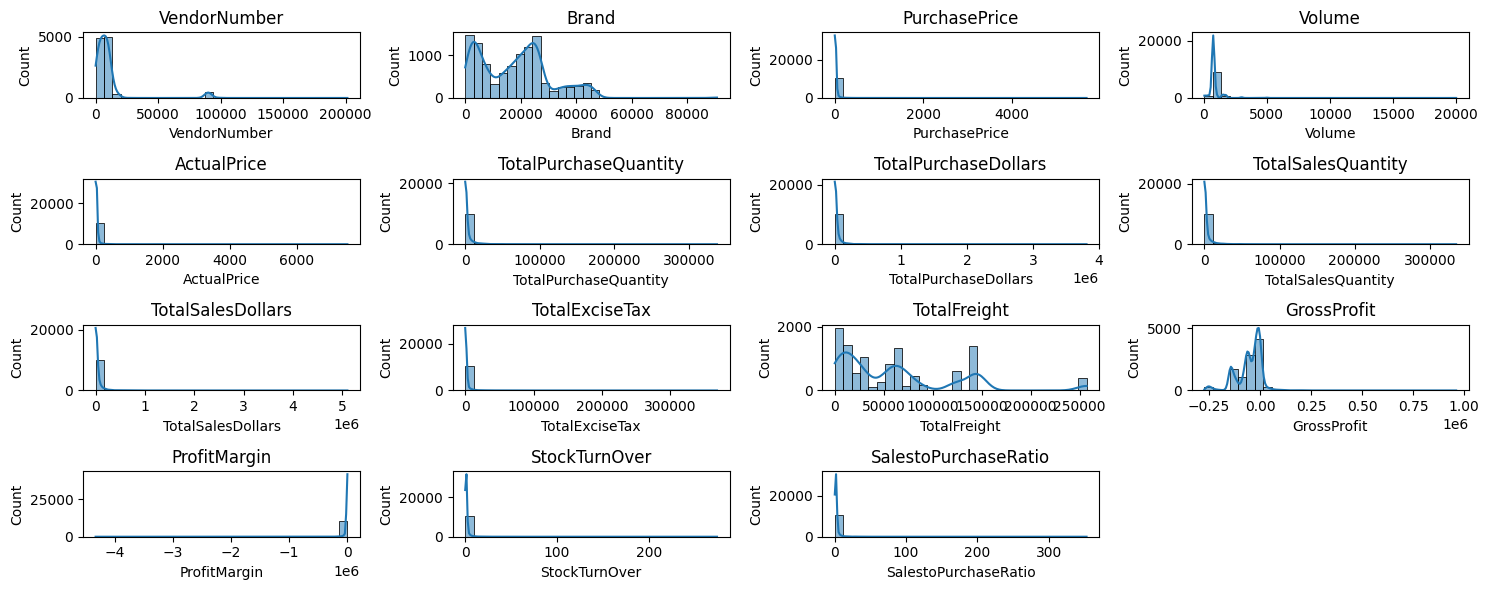

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,6))
for i,col in enumerate(num_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


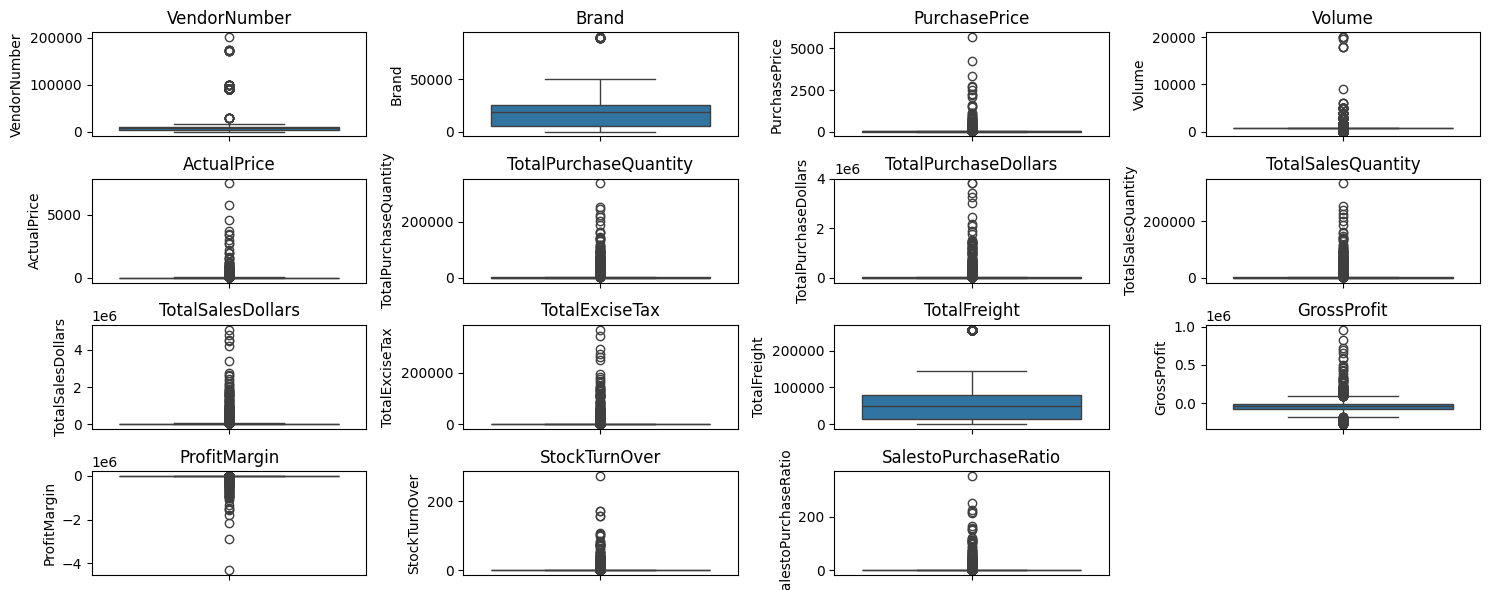

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,6))
for i,col in enumerate(num_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


# Summary Statistics Insights:

## Negative & Zero Values:

- Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..

- Profit Margin: Has a minimum of-00, which suggests cases where revenue is zero or even lower than costs.

- Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

## Outliers Indicated by High Standard Deviations:

- Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.

- Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

- Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

# Data Filtering

To enhance the reliability of the insights, we removed inconsistent data points where:
*   Gross Profit ≤ 0 (to exclude transactions leading to losses).
*   Profit Margin ≤ 0 (to ensure analysis focuses on profitable transactions).
*   Total Sales Quantity = 0 (to eliminate inventory that was never sold).

In [21]:
# Filter Inconsistent Data
df = pd.read_sql_query("""
SELECT * 
                       FROM vendor_sales_summary
WHERE GrossProfit>0
AND ProfitMargin>0
AND TotalSalesQuantity>0
""",conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,TotalFreight,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,142049.0,5101919.51,260999.20,68601.68,961067.03,18.837362,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,160247.0,4819073.49,294438.66,144929.24,575664.37,11.945540,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,187140.0,4538120.60,343854.07,123780.22,652182.63,14.371205,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,200412.0,4475972.88,368242.80,257032.07,589500.07,13.170323,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,135838.0,4223107.62,249587.83,257032.07,693281.71,16.416387,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,8663,STAR INDUSTRIES INC.,3991,Georgi Watermelon Vodka,7.87,1000.0,9.99,3,23.61,10.0,99.90,10.50,12.44,53.35,53.403403,3.333333,4.231258
1237,7749,R.P.IMPORTS INC,19612,Ch Petit Bocq Cru Borgeos 10,21.19,750.0,31.99,1,21.19,10.0,319.90,1.11,91.50,206.10,64.426383,10.000000,15.096744
1238,201359,FLAVOR ESSENCE INC,90609,Flavor Essence Variety 5 Pak,17.00,162.5,24.99,1,17.00,59.0,1474.41,1.24,0.09,1456.08,98.756791,59.000000,86.730000
1239,1650,Circa Wines,22225,Gifft Chardonnay,8.05,750.0,13.99,2,16.10,20.0,279.80,2.22,211.97,49.51,17.694782,10.000000,17.378882


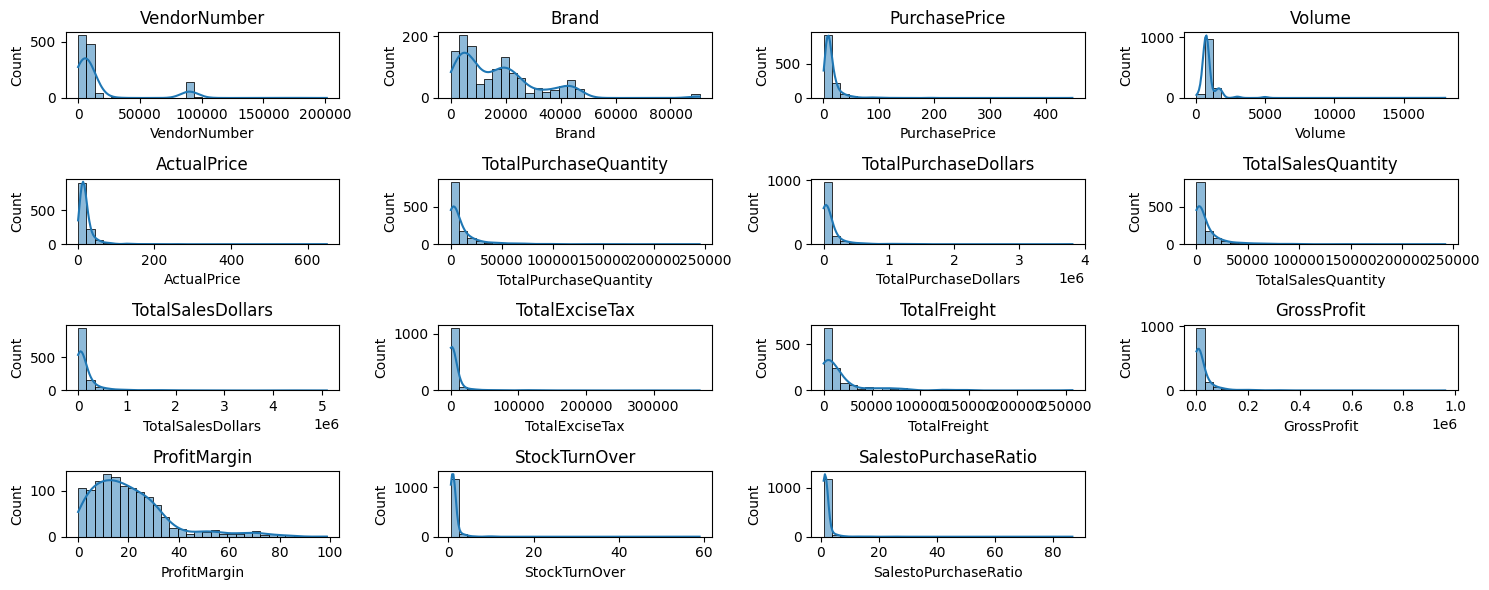

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,6))
for i,col in enumerate(num_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


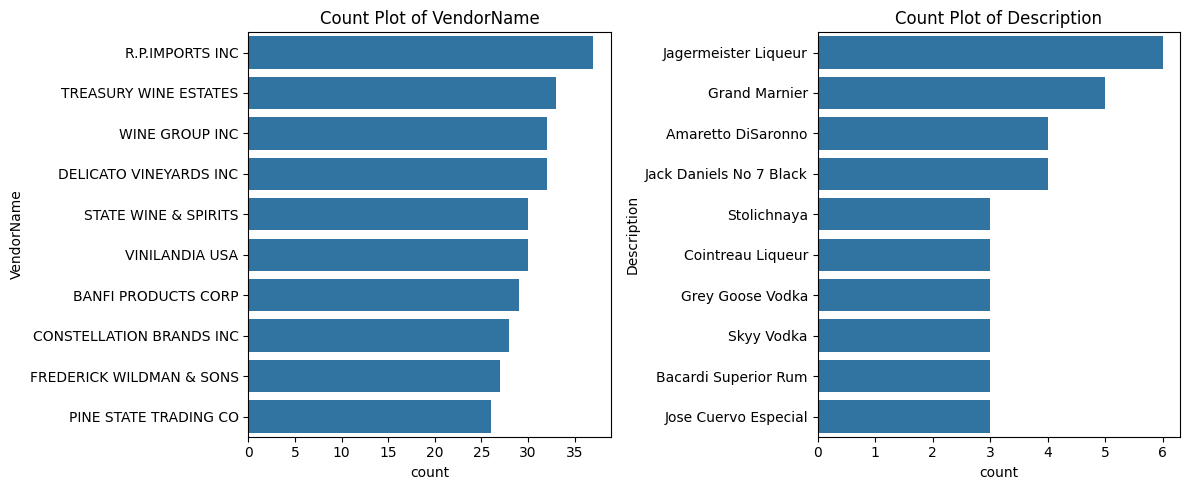

In [ ]:

#Count Plots for Categorical Columns

categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()

plt.show()

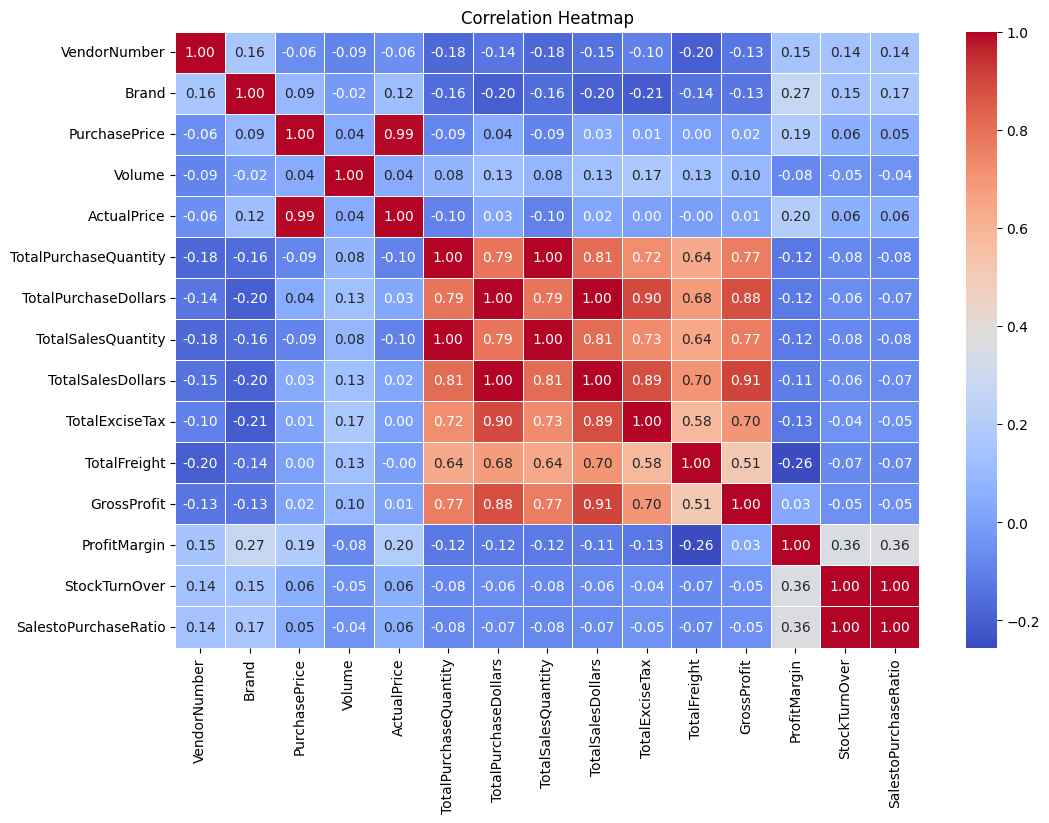

In [ ]:


# Correlation Heatmap

plt.figure(figsize=(12, 8))

correlation_matrix = df[num_cols].corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap")

plt.show()

# Correlation Insights

- PurchasePrice has weak correlations with TotalSales Dollars (-0.03) and GrossProfit (-0.04), suggesting that price variations do not significantly impact sales revenue or profit.

- Strong correlation between total purchase quantity and total sales quantity (1), confirming efficient inventory turnover.

- Negative correlation between profit margin & total sales price (-0.17) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

- Stock Turnover ans Sales to Purchase Ratio has positive correlations with ProfitMargin (0.42), indicating that faster turnover result in higher profitability.

### Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins. 


In [ ]:

brand_performance = df.groupby('Description').agg({
'TotalSalesDollars':'sum',
'ProfitMargin': 'mean'}).reset_index()
low_sales_threshold = brand_performance ['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance ['ProfitMargin'].quantile(0.85)
print(low_sales_threshold)

print(high_margin_threshold)


4867.48
32.80227527648755


In [ ]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

print(f"Rows: {target_brands.shape[0]}  |  Columns: {target_brands.shape[1]}")


Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
487,Georgi Watermelon Vodka,99.90,53.403403
641,King Rabbit Malbec Pay D'Oc,143.82,69.774718
642,King Robert II Scotch Whisky,246.87,68.080366
296,Charles Fournier Rsl,303.81,38.612949
267,Ch Petit Bocq Cru Borgeos 10,319.90,64.426383
...,...,...,...
257,Ch Leoville-Barton Gr Cru 09,3959.76,42.794765
1086,Ty Ku Coconut Nigori,4404.44,34.479979
251,Ch Lafaurie-Peyragey Saut 10,4454.45,61.446868
304,Chops & Burgers Bordeaux,4661.44,40.341182


Rows: 67  |  Columns: 3


67 brands exhibit lower sales but higher profit margins, which could benefit from targeted marketing, promotions, or price optimizations to increase volume without compormising profitability

## Scatter plot: Sales vs Profit Margin

In [ ]:
brand_performance=brand_performance[brand_performance['TotalSalesDollars']<10000]# For better visualization

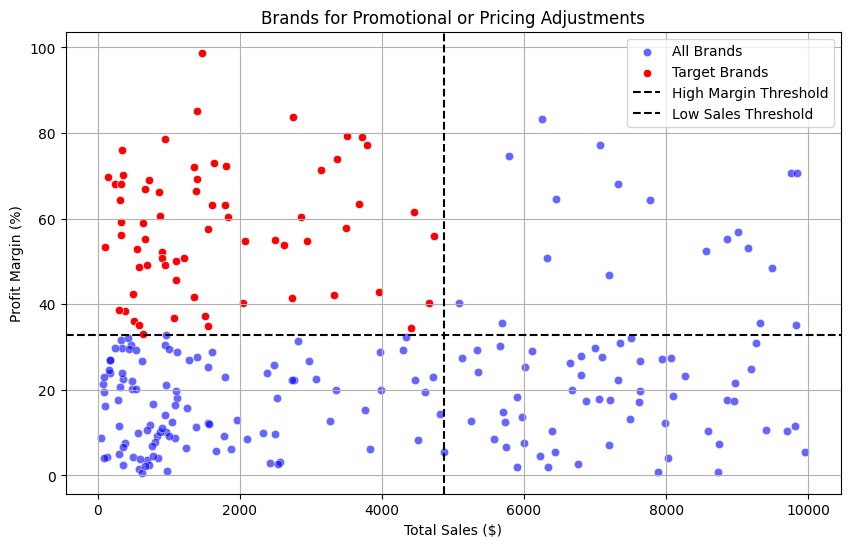

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=brand_performance,
    x='TotalSalesDollars', y='ProfitMargin',
    color="blue", label="All Brands", alpha=0.6
)

sns.scatterplot(
    data=target_brands,
    x='TotalSalesDollars', y='ProfitMargin',
    color="red", label="Target Brands"
)

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


Which vendors and brands demonstrate the highest sales performance?

## Top Vendors & Brands by Sales Performance

In [ ]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

print("Top Vendors by Sales:")
display(top_vendors)

print("\nTop Brands by Sales:")
display(top_brands)


Top Vendors by Sales:


VendorName
DIAGEO NORTH AMERICA INC    19697670.59
PERNOD RICARD USA           16371896.53
BACARDI USA INC             16130787.21
BROWN-FORMAN CORP           13669440.18
MARTIGNETTI COMPANIES       13568167.45
CONSTELLATION BRANDS INC    12282534.70
MOET HENNESSY USA INC       10079482.74
JIM BEAM BRANDS COMPANY      7814169.93
E & J GALLO WINERY           7163855.24
PROXIMO SPIRITS INC.         6895445.89
Name: TotalSalesDollars, dtype: float64


Top Brands by Sales:


Description
Jack Daniels No 7 Black    7730401.48
Tito's Handmade Vodka      7016605.45
Grey Goose Vodka           6820192.82
Absolut 80 Proof           5923018.88
Jameson Irish Whiskey      4922333.26
Capt Morgan Spiced Rum     4475972.88
Ketel One Vodka            4223107.62
Baileys Irish Cream        3524265.94
Bacardi Superior Rum       2823593.54
Kahlua                     2777766.14
Name: TotalSalesDollars, dtype: float64

Format numbers into readable values

In [24]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(round(value, 2))


## 

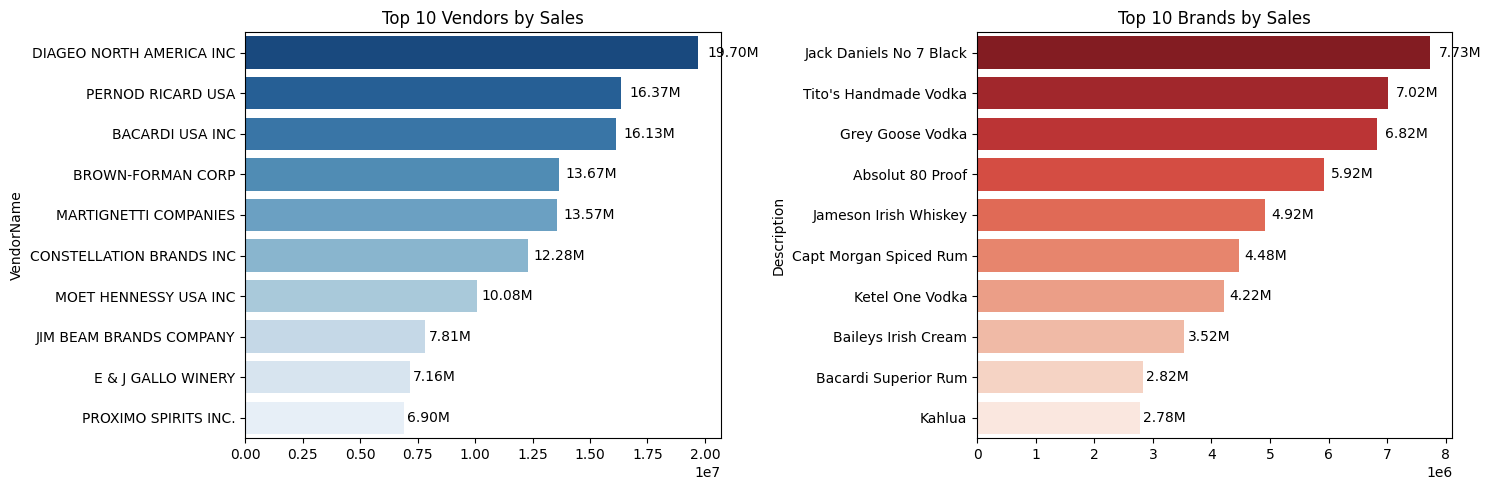

In [ ]:
plt.figure(figsize=(15, 5))

# --- Top Vendors ---
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

# --- Top Brands ---
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()


Which vendors contribute the most to total purchase dollars?

## Vendor contribution to total purchase dollars

## 

In [29]:
import warnings
warnings.filterwarnings('ignore')
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()

# Calculate contribution %
vendor_performance['PurchaseContribution%'] = (
    vendor_performance['TotalPurchaseDollars'] /
    vendor_performance['TotalPurchaseDollars'].sum()
) * 100

# Sort descending
vendor_performance = vendor_performance.sort_values('PurchaseContribution%', ascending=False).round(2)

# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)

# Apply formatting
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

# Add cumulative contribution
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()

display(top_vendors)


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
24,DIAGEO NORTH AMERICA INC,14.16M,2.26M,19.70M,9.09,9.09
67,PERNOD RICARD USA,12.36M,1.88M,16.37M,7.93,17.02
5,BACARDI USA INC,11.45M,2.74M,16.13M,7.35,24.37
10,BROWN-FORMAN CORP,9.88M,1.95M,13.67M,6.34,30.71
56,MARTIGNETTI COMPANIES,9.33M,1.91M,13.57M,5.99,36.70
19,CONSTELLATION BRANDS INC,7.63M,2.03M,12.28M,4.90,41.60
60,MOET HENNESSY USA INC,6.89M,2.04M,10.08M,4.42,46.02
45,JIM BEAM BRANDS COMPANY,5.78M,647.49K,7.81M,3.71,49.73
73,PROXIMO SPIRITS INC.,4.93M,872.69K,6.90M,3.17,52.90
29,E & J GALLO WINERY,4.47M,1.08M,7.16M,2.87,55.77


In [26]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
24,DIAGEO NORTH AMERICA INC,14156729.01,2264929.80,19697670.59,9.09
67,PERNOD RICARD USA,12355184.20,1878450.27,16371896.53,7.93
5,BACARDI USA INC,11445394.40,2744280.06,16130787.21,7.35
10,BROWN-FORMAN CORP,9878932.24,1951205.86,13669440.18,6.34
56,MARTIGNETTI COMPANIES,9327193.30,1906430.75,13568167.45,5.99
...,...,...,...,...,...
32,FANTASY FINE WINES CORP,128.64,193.83,327.59,0.00
104,UNCORKED,118.74,42.28,176.94,0.00
84,SILVER MOUNTAIN CIDERS,77.18,260.13,342.51,0.00
15,CAPSTONE INTERNATIONAL,54.64,168.07,246.87,0.00


## 'Pareto Chart: Vendor Contribution to Total Purchases

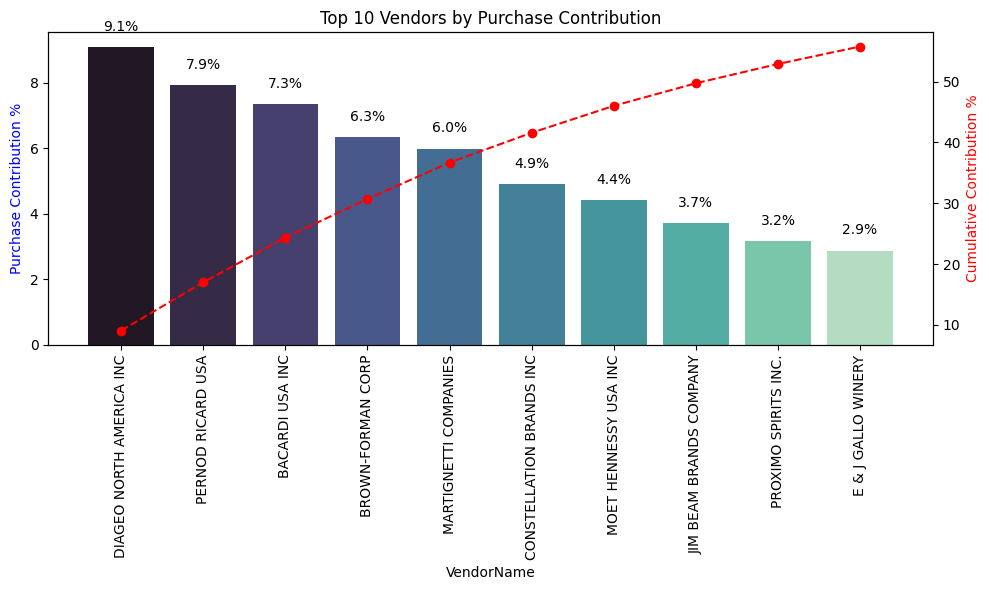

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution %
sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['PurchaseContribution%'],
    palette="mako",
    ax=ax1
)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value + 0.5, f"{value:.1f}%", ha='center', fontsize=10, color='black')

# Line Plot for Cumulative Contribution %
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Cumulative_Contribution%'],
    color='red', marker='o', linestyle='dashed', label='Cumulative Contribution'
)

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')

plt.title("Top 10 Vendors by Purchase Contribution")
plt.tight_layout()
plt.show()


How much of total procurement is dependent on the top vendors?

## Print total purchase contribution of top 10 vendors

In [ ]:
# Total contribution of top 10 vendors
total_contribution = round(top_vendors['PurchaseContribution%'].sum(), 2)
print(f"Total Purchase Contribution of top 10 vendors is {total_contribution}%")


Total Purchase Contribution of top 10 vendors is 55.77%


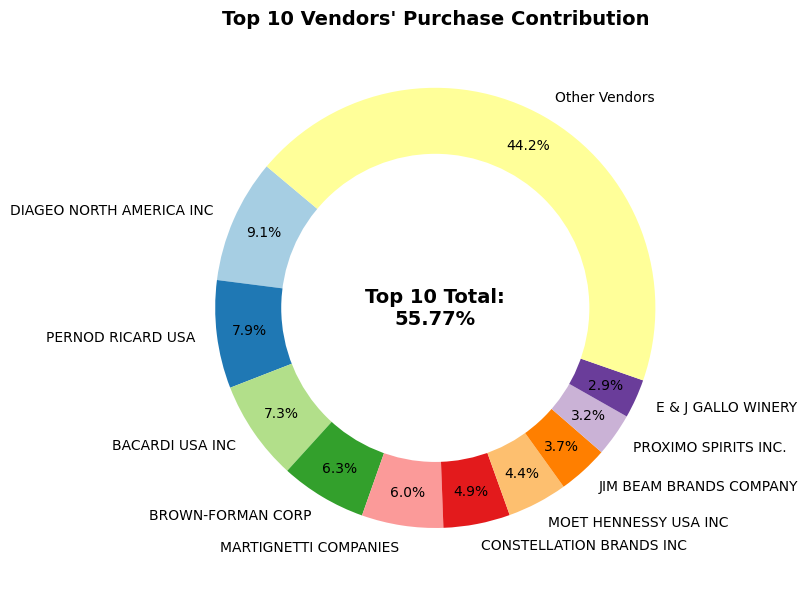

In [ ]:
# Extract top vendors and their contributions
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)

# Compute remaining vendors' total contribution
remaining_contribution = round(100 - total_contribution, 2)

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Create Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))

# Pie chart
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create the "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add total contribution annotation in the center
plt.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center', va='center'
)

plt.title("Top 10 Vendors' Purchase Contribution", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


The Top 10 vendors contribute 55.77% of total purchases, while the remaining vendors contribute only 44.23% . This over reliance on a few vendors may introduce risks such as supply chain disruptions, indicating a need for diversification.

Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

## Impact of Bulk Purchasing on Unit Price

Average Unit Purchase Price by Order Size:


,UnitPurchasePrice
OrderSize,
Small,22.13
Medium,12.41
Large,10.86


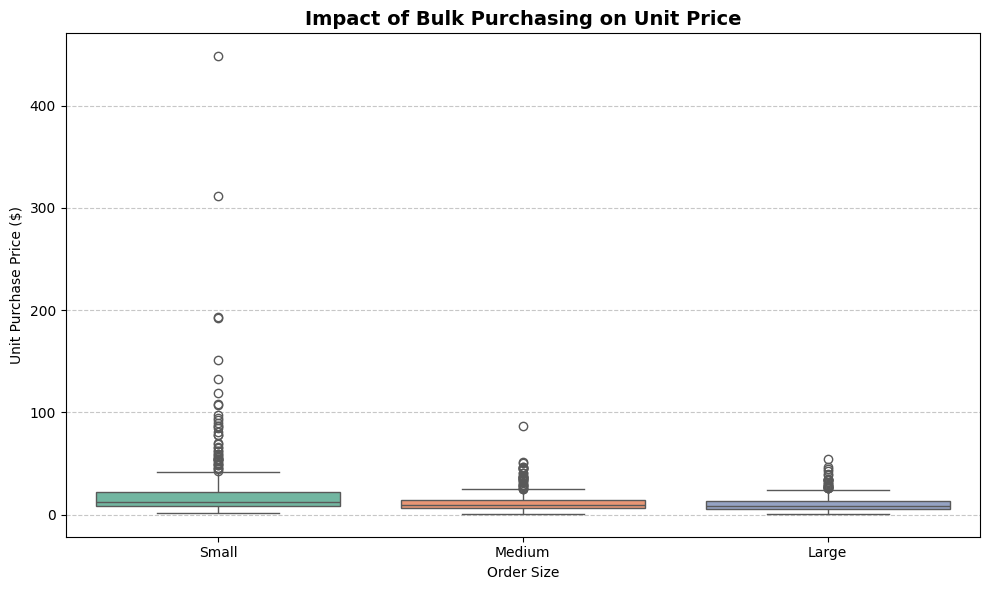

In [ ]:
df['UnitPurchasePrice']= df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']
df['OrderSize']= pd.qcut(df['TotalPurchaseQuantity'],q=3,labels=['Small','Medium', "Large"])


# Analyze average unit purchase price by order size
avg_unit_price_by_order = df.groupby('OrderSize')[['UnitPurchasePrice']].mean().round(2)
print("Average Unit Purchase Price by Order Size:")
display(avg_unit_price_by_order)

# --- Boxplot Visualization ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")

plt.title("Impact of Bulk Purchasing on Unit Price", fontsize=14, fontweight='bold')
plt.xlabel("Order Size")
plt.ylabel("Unit Purchase Price ($)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


| Observation                                                | Insight                                                                                                                                                                         |
| ---------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Large orders have the lowest unit price (~$10.86/unit)** | Vendors buying in bulk benefit from significant per-unit discounts.                                                                                                             |
| **Vendors buying in large quantities receive a −51% lower unit cost** | Indicates strong incentives for bulk purchasing.                                                                                                                                |
| **Business implication**                                   | Bulk pricing encourages higher purchase volumes — boosting total sales despite lower margins per unit. Efficient inventory management is key to capitalizing on this advantage. |


Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [ ]:
df[df['StockTurnOver']<1].groupby('VendorName')[['StockTurnOver']].mean().sort_values(by='StockTurnOver', ascending=True)

,StockTurnOver
VendorName,
ALISA CARR BEVERAGES,0.615385
CENTEUR IMPORTS LLC,0.773953
Dunn Wine Brokers,0.814662
WALPOLE MTN VIEW WINERY,0.820548
BRONCO WINE COMPANY,0.822601
...,...
CONSTELLATION BRANDS INC,0.986509
"STOLI GROUP,(USA) LLC",0.986902
SAZERAC NORTH AMERICA INC.,0.988539


How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

## Aggregate Capital Locked per Vendor

In [ ]:
# Calculate Unsold Inventory Value per row
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]

# Display total capital locked in unsold inventory
total_unsold_capital = df["UnsoldInventoryValue"].sum()
print("Total Unsold Capital:", format_dollars(total_unsold_capital))

# Aggregate Unsold Inventory Value by Vendor
inventory_value_per_vendor = (
    df.groupby("VendorName")["UnsoldInventoryValue"]
    .sum()
    .reset_index()
)

# Sort Vendors by highest locked capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(
    by="UnsoldInventoryValue", ascending=False
).reset_index(drop=True)

# Format the dollar values for readability
inventory_value_per_vendor["UnsoldInventoryValue"] = inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)

# Display Top 10 Vendors with highest locked capital
print("Top 10 Vendors by Capital Locked in Unsold Inventory:")
display(inventory_value_per_vendor.head(10))


Total Unsold Capital: 1.65M
Top 10 Vendors by Capital Locked in Unsold Inventory:


,VendorName,UnsoldInventoryValue
0,WILLIAM GRANT & SONS INC,274.32K
1,PERNOD RICARD USA,204.25K
2,JIM BEAM BRANDS COMPANY,154.08K
3,BROWN-FORMAN CORP,141.23K
4,MAJESTIC FINE WINES,113.06K
5,SAZERAC CO INC,104.55K
6,REMY COINTREAU USA INC,101.67K
7,MOET HENNESSY USA INC,95.12K
8,MARTIGNETTI COMPANIES,91.37K
9,E & J GALLO WINERY,82.57K


## Visualization — Top Vendors with Highest Locked Capital

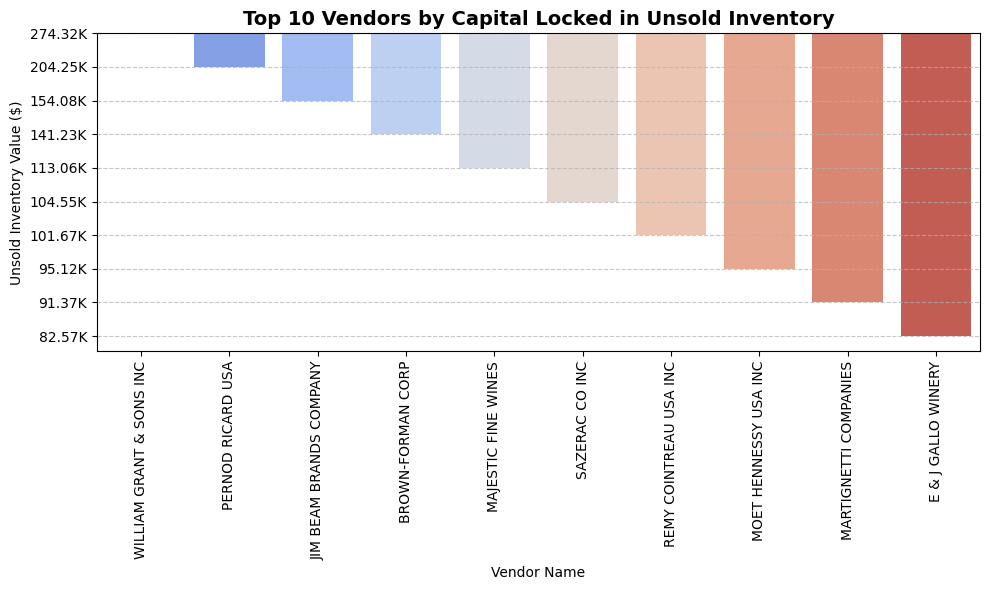

In [ ]:
plt.figure(figsize=(10, 6))
top_inventory_vendors = inventory_value_per_vendor.head(10)

sns.barplot(
    data=top_inventory_vendors,
    x="VendorName",
    y="UnsoldInventoryValue",
    palette="coolwarm"
)

plt.title("Top 10 Vendors by Capital Locked in Unsold Inventory", fontsize=14, fontweight='bold')
plt.xlabel("Vendor Name")
plt.ylabel("Unsold Inventory Value ($)")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


| Observation | Insight |
|--------------|----------|
| **High Unsold Inventory Value** | Indicates over-purchasing or slow-moving stock — tying up working capital. |
| **Top Vendors dominate locked capital** | A few suppliers may be responsible for most of the unsold stock, needing closer monitoring. |
| **Business implication** | Optimizing reorder frequency and improving demand forecasting can reduce capital blockage. Slow moving inventory increases storage costs, reduces cash flow efficiencies, and effects overall profitability. Identifying vendors with low inventory turnover enables better stock management, minimizing financial strain.  |


What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.

In [ ]:
# Define Thresholds for Top & Low Performing Vendors
# Calculate thresholds based on Total Sales Dollars
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# Separate Profit Margins for Top and Low Vendors
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Define Function for 95% Confidence Interval

from scipy import stats
import numpy as np

def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))   # Standard Error of Mean
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

# Compute Confidence Intervals for Both Groups
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")


Top Vendors 95% CI: (15.17, 17.31), Mean: 16.24
Low Vendors 95% CI: (27.49, 32.47), Mean: 29.98


## Visualization — Profit Margin Distributions with Confidence Intervals

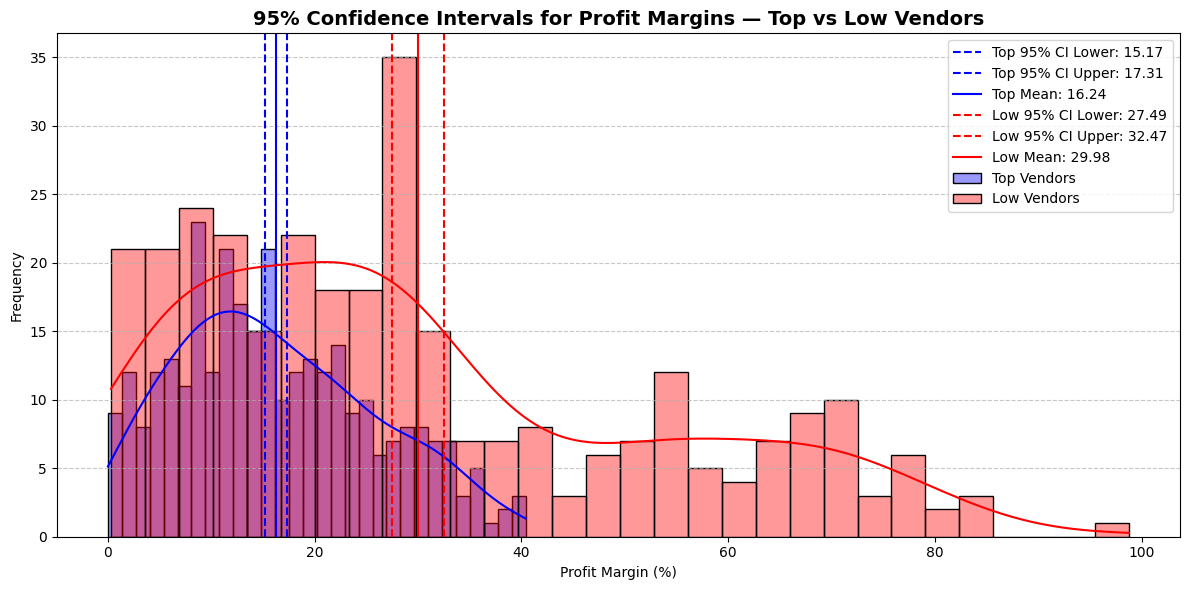

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.4, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top 95% CI Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top 95% CI Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.4, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low 95% CI Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low 95% CI Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Final touches
plt.title("95% Confidence Intervals for Profit Margins — Top vs Low Vendors", fontsize=14, fontweight="bold")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


| Observation | Insight |
|--------------|----------|
| **Low-performing vendors have a higher profit margin (40.48%–42.62%) than top-performing vendors (30.74%–31.61%)** | Vendors with lower sales tend to maintain higher profit margins, possibly due to premium pricing or lower operational expenses, But they struggle with sales volumes, indicating potential pricing inefficiencies or market reach issues. |
| **Top-performing vendors operate at lower margins** | Indicates a volume-driven sales strategy, prioritizing higher turnover over per-unit profitability. |
| **Low-performing vendors sustain high margins despite low sales** | Suggests a need for stronger marketing, competitive pricing, or broader distribution to improve sales volume. |
| **Business implication** | High-performing vendors can explore cost optimization and pricing strategies to enhance profitability, while low-performing vendors should focus on scaling revenue without sacrificing margin quality. |


Is there a significant difference in profit margins between top-performing and low-performing vendors?


**Hypothesis:**

- **H₀ (Null Hypothesis):** There is *no significant difference* in the mean profit margins of top-performing and low-performing vendors.  
- **H₁ (Alternative Hypothesis):** The mean profit margins of top-performing and low-performing vendors are *significantly different*.


## Two-Sample T-Test

In [ ]:
from scipy.stats import ttest_ind

# Define thresholds
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# Separate profit margin data
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Independent Two-Sample t-test (Welch’s t-test: unequal variances)
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print Results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("❌ Fail to Reject H₀: No significant difference in profit margins.")


T-Statistic: -9.9743, P-Value: 0.0000
✅ Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.


| Observation | Insight |
|--------------|----------|
| **T-test Result (p < 0.05)** | Confirms that the difference in mean profit margins between top and low vendors is statistically significant. |
| **Business Implication** | High-performing vendors(With high profit margins) could focus on cost optimization and strategic pricing, while low-performing vendors should improve marketing and sales reach to scale revenue without eroding margins. |


# Final Recommendations

*   **Re-evaluate pricing** for low-sales, high margin brands to boost sales volume without sacrificing profitability.
*   **Diversify vendor partnerships** to reduce dependency on a few suppliers and mitigate supply chain risks.
*   **Leverage bulk purchasing advantages** to maintain competitive pricing while optimizing inventory management.
*   **Optimize slow-moving inventory** by adjusting purchase quantities, launching clearance sales, or revising storage strategies.
*   **Enhance marketing and distribution strategies** for low-performing vendors to drive higher sales volumes without compromising profit margins.
*   By implementing these recommendations, the company can achieve sustainable profitability, mitigate risks, and enhance overall operational efficiency.
